## 1. Load the libraries

In [32]:
import requests as rq
from bs4 import BeautifulSoup
import os
import re
import pandas as pd
import unidecode
import string
import nltk
from nltk.corpus import stopwords
%matplotlib inline

## 2. Get the data

I noticed that reviews had different format before 2014 -> I used data from 2014, 2015, 2016

In [6]:
page=list()

for i in range(2014,2017):
    url = 'https://www.bellen.com/mobiele-providers/kpn/klantervaringen/'+str(i)
    page.append(rq.get(url).text)
    
soup=BeautifulSoup("\n".join(page),'html.parser')

In [7]:
reviews_list=[[]]*len(soup.find_all('div',{'class':"reviewListItemText contentText clearfix"}))

for i in range(len(soup.find_all('div',{'class':"reviewListItemText contentText clearfix"}))):
    reviews_list[i]=soup.find_all('div',{'class':"reviewListItemText contentText clearfix"})[i].text

In [8]:
scores_list=[[]]*len(soup.find_all('div',{'class':"scoreNrPlain"}))

for i in range(len(soup.find_all('div',{'class':"scoreNrPlain"}))):
    scores_list[i]=soup.find_all('div',{'class':"scoreNrPlain"})[i].text

In [9]:
## score 99 means nvt

list_scores_per_cat= [[]]*len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))
prijsstelling      = [[]]*len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))
klantenservice     = [[]]*len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))
bestelproces       = [[]]*len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))
facturering        = [[]]*len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))
online_dienst      = [[]]*len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))
bereik_dekking     = [[]]*len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))
klantenafhandeling = [[]]*len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))

for i in range(len(soup.find_all('div',{'class':"reviewListItemScoreDetail"}))):
    list_scores_per_cat[i]=soup.find_all('div',{'class':"reviewListItemScoreDetail"})[i].text    
    prijsstelling[i]      = re.sub("[^0-9]",' ',re.sub("n.v.t",'99',list_scores_per_cat[i])).split()[0]     
    klantenservice[i]     = re.sub("[^0-9]",' ',re.sub("n.v.t",'99',list_scores_per_cat[i])).split()[1]
    bestelproces[i]       = re.sub("[^0-9]",' ',re.sub("n.v.t",'99',list_scores_per_cat[i])).split()[2]
    facturering[i]        = re.sub("[^0-9]",' ',re.sub("n.v.t",'99',list_scores_per_cat[i])).split()[3]
    online_dienst[i]      = re.sub("[^0-9]",' ',re.sub("n.v.t",'99',list_scores_per_cat[i])).split()[4]    
    bereik_dekking[i]     = re.sub("[^0-9]",' ',re.sub("n.v.t",'99',list_scores_per_cat[i])).split()[5]
    klantenafhandeling[i] = re.sub("[^0-9]",' ',re.sub("n.v.t",'99',list_scores_per_cat[i])).split()[6]

## 3. Store it all in pandas dataframe; clean the reviews -> continue in R using R magic

In [10]:
df = pd.DataFrame(zip(reviews_list, scores_list, prijsstelling, klantenservice, bestelproces, facturering, online_dienst, bereik_dekking, klantenafhandeling),
             columns=['review','score','prijsstelling', 'klantenservice', 'bestelproces', 'facturering', 'online_dienst', 'bereik_dekking', 'klantenafhandeling'])

### 3.1. Clean

In [11]:
def cleanData(strg,stopwords):
    line = re.sub("[^a-zA-Z]",' ',strg)
    line = re.sub('  ',' ',line)
    line=line.encode('utf-8')
    line=str.lower(line)
    querywords = line.split()
    resultwords  = [word for word in querywords if word not in stopwords]
    result = ' '.join(resultwords)
    return result

In [12]:
#nltk.download('stopwords')
stopwords_list=list(string.lowercase)+stopwords.words("dutch")
df["review"]=df["review"].apply(lambda strg: cleanData(strg,stopwords_list))

In [13]:
df.head(10)

,review,score,prijsstelling,klantenservice,bestelproces,facturering,online_dienst,bereik_dekking,klantenafhandeling
0,werkt kun prima kpn voeten wanneer probleem aa...,4,5,1,5,1,1,5,7
1,gestapt simyo kpn sim only familievoordeel com...,8,9,7,8,9,9,9,5
2,jaren problemen kpn overgestapt providers zowe...,1,1,2,1,1,1,1,1
3,verbeterpunt,1,1,99,99,99,1,99,99
4,jaar klant kpn kpn zakelijk alkmaar head set a...,1,1,1,1,1,1,1,1
5,onderstaand bericht geduldige man zijdelings g...,1,1,1,1,1,1,1,1
6,bagger bagger bagger diverse zakelijke dienste...,1,1,1,1,1,1,1,1
7,vier jaar gezeik bedrijf kost gemiddeld euro p...,1,1,1,1,1,1,1,1
8,kpn slecht luisterend bedrijf slechtere produc...,2,99,1,1,99,5,1,1
9,kpn prepaid zoon jr telefoon kpn prepaid belt ...,2,99,1,99,1,3,99,99


In [14]:
len(df)

98

In [132]:
#df.to_csv('reviews.csv',encoding='utf-8',index=False)

### 3.2. R magic 

In [15]:
%reload_ext rpy2.ipython
%R -i df

In [ ]:
%%R
library(ggplot2)
library(stringr)

In [16]:
%R head(df) ## now it is an R dataframe and we can just code R

,review,score,prijsstelling,klantenservice,bestelproces,facturering,online_dienst,bereik_dekking,klantenafhandeling
1,werkt kun prima kpn voeten wanneer probleem aa...,4,5,1,5,1,1,5,7
2,gestapt simyo kpn sim only familievoordeel com...,8,9,7,8,9,9,9,5
3,jaren problemen kpn overgestapt providers zowe...,1,1,2,1,1,1,1,1
4,verbeterpunt,1,1,99,99,99,1,99,99
5,jaar klant kpn kpn zakelijk alkmaar head set a...,1,1,1,1,1,1,1,1
6,onderstaand bericht geduldige man zijdelings g...,1,1,1,1,1,1,1,1


## 4. Text analytics in R

** To do:**
1) Count the frequency of the words and sort on highest frequency. Repeat for positive reviews and negative reviews.

*Extra: which words are overrepresented in positive reviews compared to negative reviews?
Make a word cloud with stop words removed and words stemmed. Do this separately for positive and negative reviews.*

2) Match the words in the reviews with the positive and negative dictionary (use the Dutch Lexicon provided). To what extend are negative words overrepresented in reviews with low ratings? 

*Extra: can you predict the rating of the review by looking at the number of positive or negative words?*

3) Do you see connections between the overall rating and the other ratings per customer? Between the review and the other ratings? Which rating has the strongest predictive power?

### 4.1. Positive vs negative reviews

#### 4.1.1. First, distribution of the reviews + some statistics

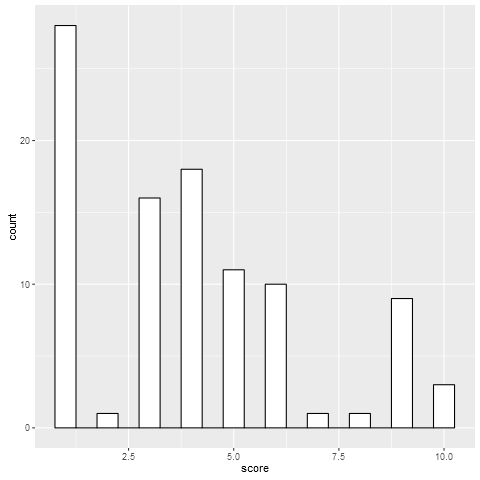

In [19]:
%%R
df$score <- as.numeric(df$score)
ggplot(df, aes(x=score)) + geom_histogram(binwidth=.5, colour="black", fill="white")

In [67]:
%%R 
my.summary <- function(x, na.rm = TRUE) {
      result <- data.frame(
        "mean" = mean(x, na.rm = na.rm),
        "sd" = sd(x, na.rm = na.rm),
        "median" = median(x, na.rm = na.rm),
        "min" = min(x, na.rm = na.rm),
        "max" = max(x, na.rm = na.rm),
        "n" = length(x)
      )
    }

In [68]:
%R my.summary(df$score)

,mean,sd,median,min,max,n
1,3.989796,2.649625,4,1,10,98


#### 4.1.2. Load lexicon

In [ ]:
%%R
## only active lexicon
lexicon <- read.csv('lexicon_dutch.csv',sep=';')
lexicon <- lexicon[lexicon$Positive+lexicon$Negative+lexicon$Trust+lexicon$Surprise+lexicon$Joy+
          lexicon$Sadness+lexicon$Fear+lexicon$Disgust+lexicon$Anger+lexicon$Anticipation>0,]

#### 4.1.3. Create a matrix with count of words in lexicon per review -> create a dataframe

In [25]:
%%R
reviews_matrix <- matrix(, nrow = nrow(df), ncol = length(as.character(lexicon$Woord)))
for (i in 1:nrow(df))
{for (j in 1:nrow(lexicon))
{ reviews_matrix[i,j]=sum(str_count(as.character(df$review[i]),as.character(lexicon$Woord)[j]))}
}

colnames(reviews_matrix) <- as.character(lexicon$Woord)

wordcount_df <- as.data.frame(reviews_matrix)
wordcount_df$score <- df$score

#### 4.1.4. Top 100 most positive reviews

In [39]:
%%R
wordcounts_pos <- colSums(wordcount_df[wordcount_df$score>=4,])
sort(wordcounts_pos, decreasing = TRUE)[0:100]
names(sort(wordcounts_pos, decreasing = TRUE)[0:100])

dat_pos<-data.frame("words" = names(sort(wordcounts_pos, decreasing = TRUE)[0:100]),
                    "counts" = as.numeric(sort(wordcounts_pos, decreasing = TRUE)[0:100]))
dat_pos<-dat_pos[dat_pos$words!='score',]

In [40]:
%R head(dat_pos)

,words,counts
2,lijk,73
3,eer,68
4,klant,57
5,rij,39
6,ja,32
7,as,31


In [44]:
%%R
wordcloud2(data = dat_pos)

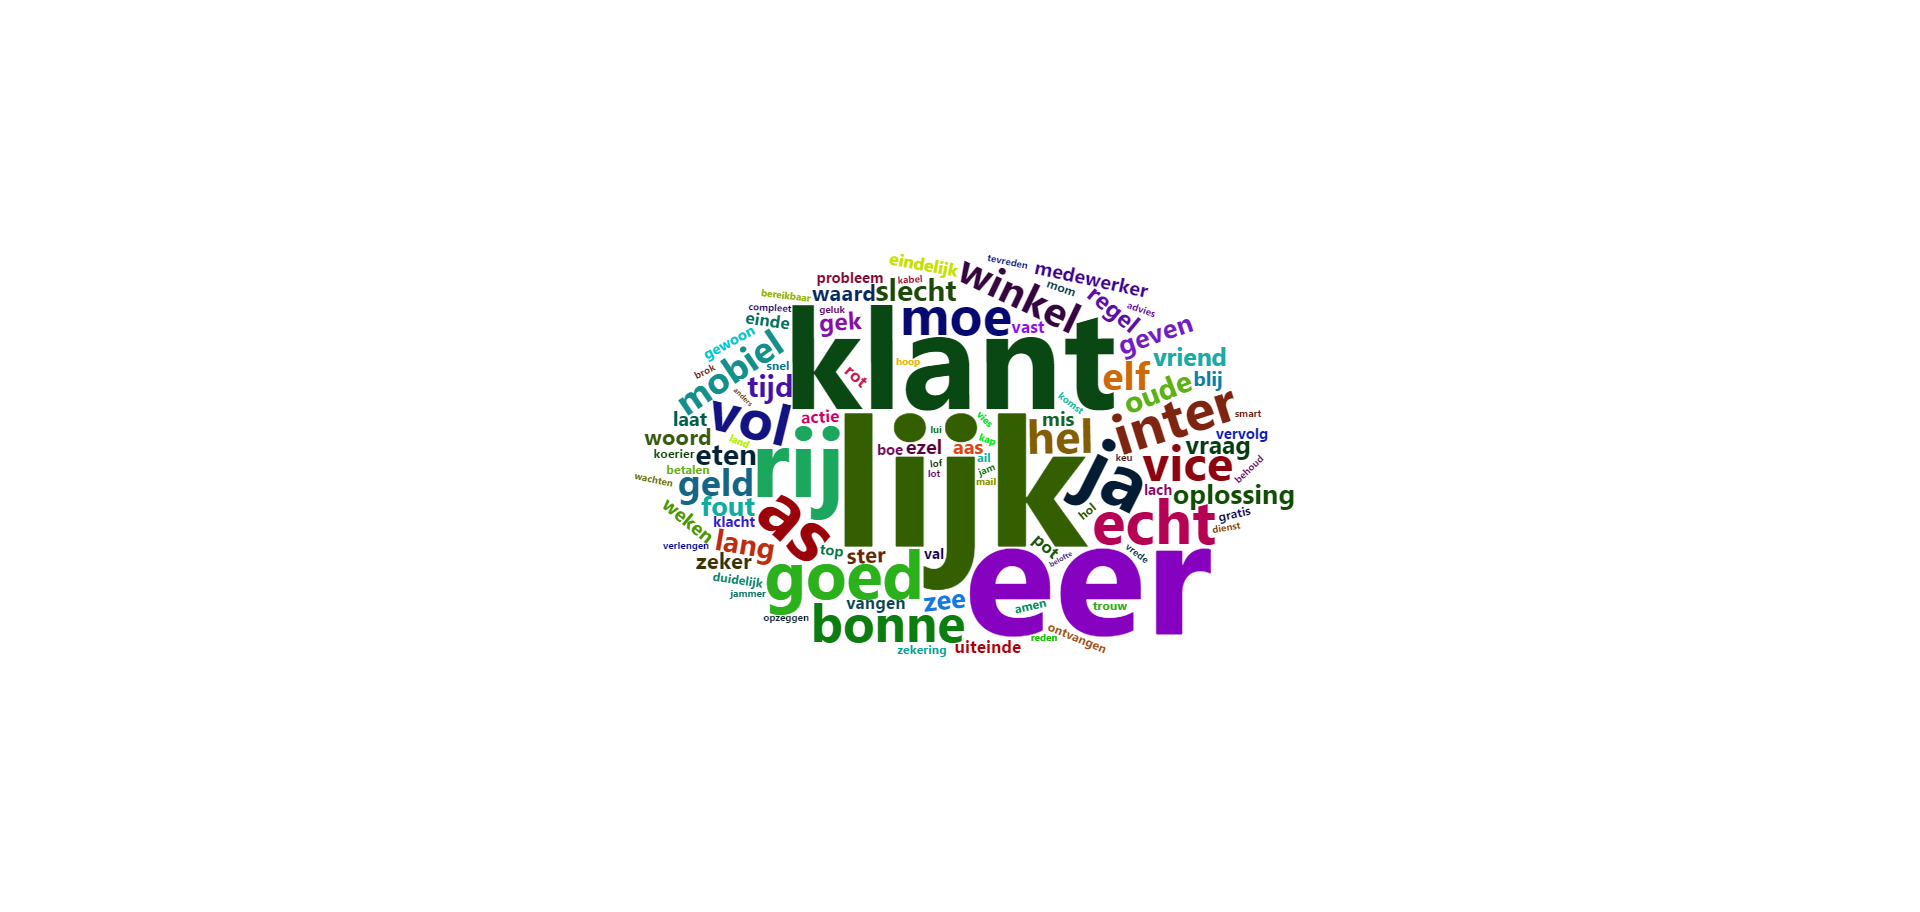

In [49]:
from IPython.display import Image
Image(filename='wordcloud_pos.png')

#### 4.1.5. Top 100 most negative reviews

In [38]:
%%R
wordcounts_neg <- colSums(wordcount_df[wordcount_df$score<4,])
sort(wordcounts_neg, decreasing = TRUE)[0:100]
names(sort(wordcounts_neg, decreasing = TRUE)[0:100])

dat_neg<-data.frame("words" = names(sort(wordcounts_neg, decreasing = TRUE)[0:100]),
                "counts" = as.numeric(sort(wordcounts_neg, decreasing = TRUE)[0:100]))
dat_neg<-dat_pos[dat_neg$words!='score',]

In [41]:
%R head(dat_neg)

,words,counts
3,eer,68
4,klant,57
5,rij,39
6,ja,32
7,as,31
8,goed,27


In [70]:
%%R
wordcloud2(data = dat_neg)

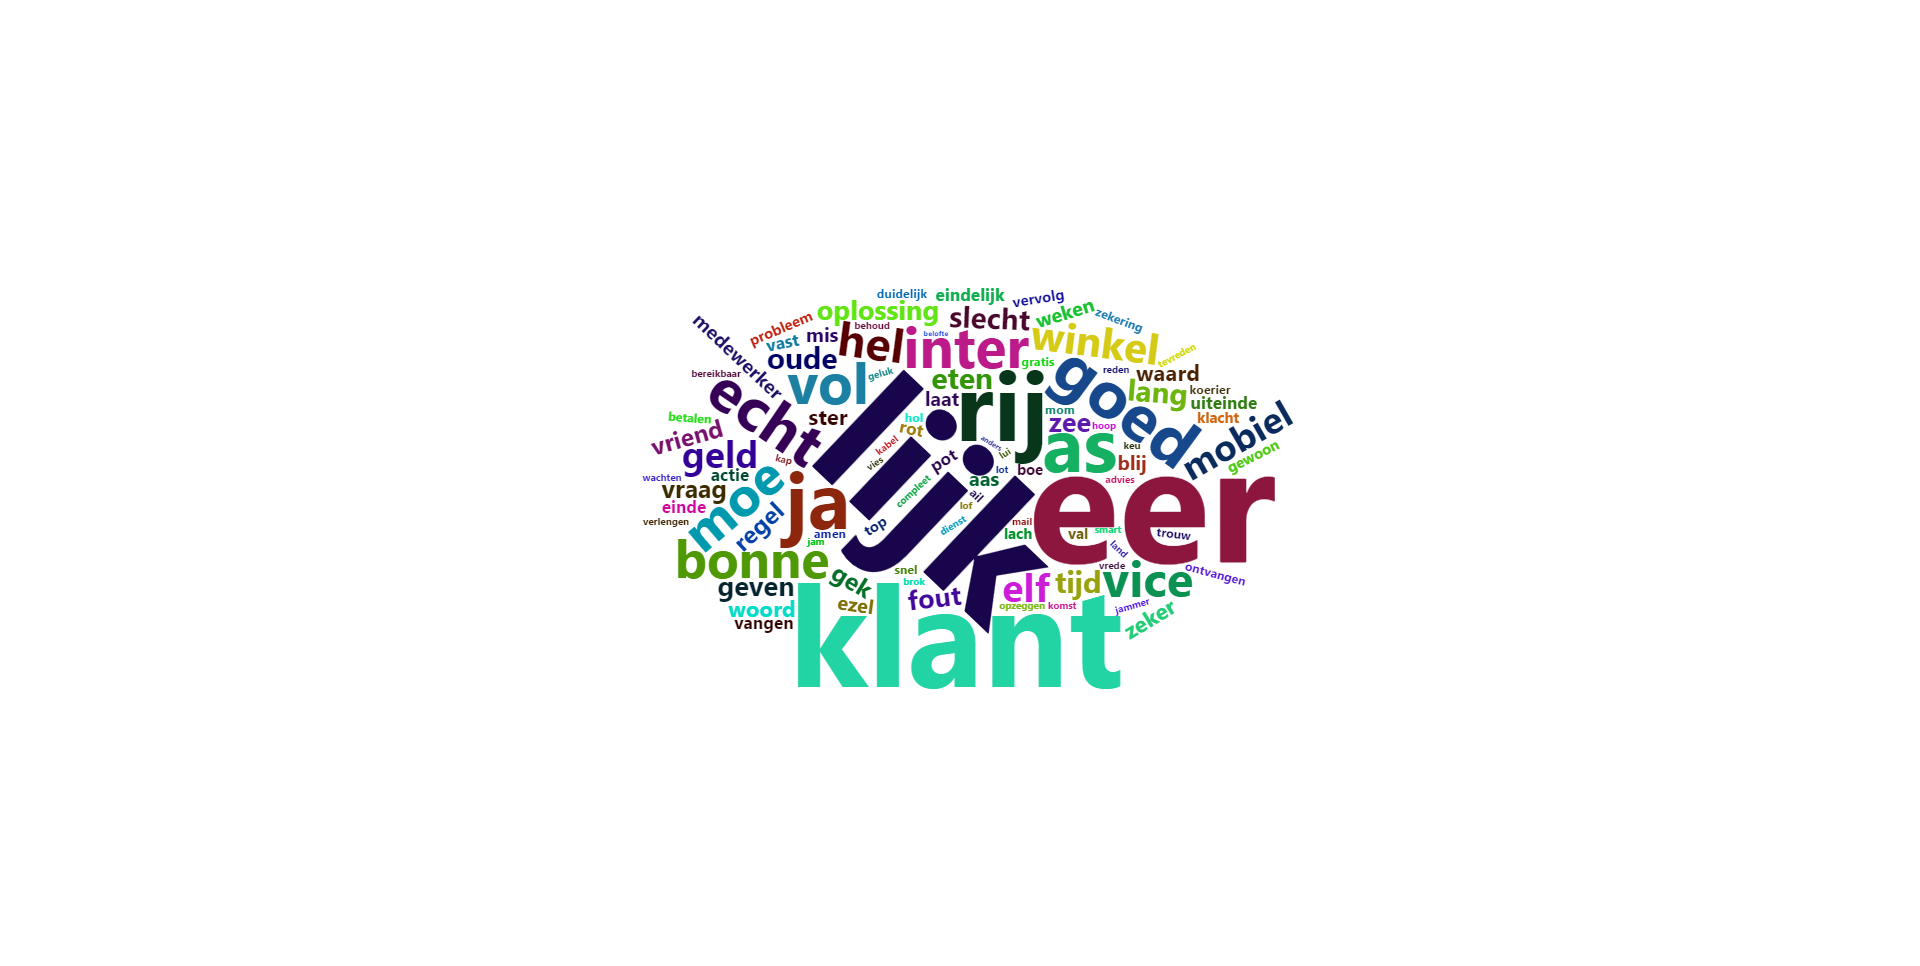

In [54]:
from IPython.display import Image
Image(filename='wordcloud_neg.png')

**Conclusion**: the word counts for positive and negative reviews are extremly similar -> we might doubt about the quality of the lexicon

### 4.2. Lexicon analysis

In [72]:
%R head(wordcount_df)

,aanbevelenswaardig,aanbiddelijk,aanbidden,aanbidding,aanbod,aandacht,aandachtig,aandeel,aandenken,aangemeerd,...,zwartheid,zwavel,zweep,zweet,zwembad,zwemmen,zwengel,zweren,zwierig,score
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
%R head(lexicon)

,Woord,Positive,Negative,Trust,Surprise,Joy,Sadness,Fear,Disgust,Anger,Anticipation
4,aanbevelenswaardig,1,0,1,0,1,0,0,0,0,0
5,aanbiddelijk,1,0,0,0,1,0,0,0,0,0
6,aanbidden,1,0,1,0,1,0,0,0,0,1
8,aanbidding,1,0,1,0,1,0,1,0,0,1
9,aanbod,1,0,0,0,0,0,0,0,0,0
11,aandacht,1,0,0,0,0,0,0,0,0,0


In [81]:
%%R
positive       <- as.character(lexicon[lexicon$Positive==1,]$Woord)
negative       <- as.character(lexicon[lexicon$Negative==1,]$Woord)
trust          <- as.character(lexicon[lexicon$Trust==1,]$Woord)
surprise       <- as.character(lexicon[lexicon$Surprise==1,]$Woord)
joy            <- as.character(lexicon[lexicon$Joy==1,]$Woord)
sadness        <- as.character(lexicon[lexicon$Sadness==1,]$Woord)
fear           <- as.character(lexicon[lexicon$Fear==1,]$Woord)
disgust        <- as.character(lexicon[lexicon$Disgust==1,]$Woord)
anger          <- as.character(lexicon[lexicon$Anger==1,]$Woord)
ancicipation   <- as.character(lexicon[lexicon$Anticipation==1,]$Woord)

In [121]:
%%R 
df_sentiment <-
data.frame(
   "score"=wordcount_df$score,
   "positive"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% positive))]),
   "negative"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% negative))]),
   "trust"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% trust))]),
   "surprise"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% surprise))]),
   "joy"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% joy))]),
   "sadness"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% sadness))]),
   "fear"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% fear))]),
   "disgust"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% disgust))]),
   "anger"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% anger))]),
   "anticipation"=rowSums(wordcount_df[,c(which(colnames(wordcount_df) %in% ancicipation))]))

In [127]:
%R head(df_sentiment)

,score,positive,negative,trust,surprise,joy,sadness,fear,disgust,anger,anticipation,score_type
1,5,23,16,11,2,5,12,8,6,4,7,positive
2,9,9,8,4,6,2,6,2,3,2,4,positive
3,1,4,4,2,0,1,2,1,2,1,2,negative
4,1,0,0,0,0,0,0,0,0,0,0,negative
5,1,6,8,1,0,2,4,0,2,2,2,negative
6,1,23,16,12,3,4,6,5,6,9,9,negative


In [147]:
%%R
df_sentiment$score_type <- ifelse(df_sentiment$score>=6,'positive','negative')

#### Pass data back to Python

In [148]:
%Rpull  df_sentiment

In [149]:
positive_sentiments = df_sentiment[df_sentiment.score_type=='positive']
positive_sentiments=positive_sentiments.drop('score', axis = 1)
positive_sentiments=positive_sentiments.drop('score_type', axis = 1)

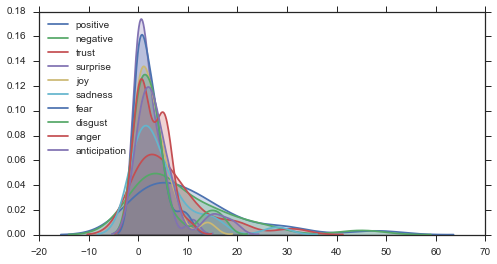

In [150]:
## distribution for positive reviews
import matplotlib.pyplot as plt
import seaborn as sns
# specify plot style and set color scheme
plt.figure(figsize=(8,4))
for col in positive_sentiments.columns:
    sns.kdeplot(positive_sentiments[col], shade=True)
plt.legend(loc=2);

In [151]:
negative_sentiments = df_sentiment[df_sentiment.score_type=='negative']
negative_sentiments=negative_sentiments.drop('score', axis = 1)
negative_sentiments=negative_sentiments.drop('score_type', axis = 1)

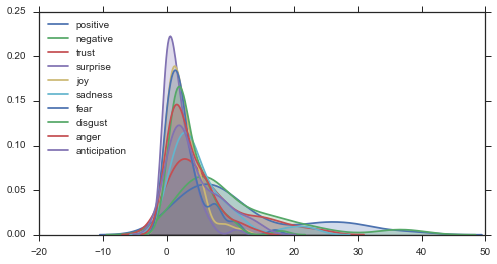

In [152]:
plt.figure(figsize=(8,4))
for col in negative_sentiments.columns:
    sns.kdeplot(negative_sentiments[col], shade=True)
plt.legend(loc=2);

Almost no difference in graphs -> proves the hypothesis that lexicon  is not really suitable for sentiment analysis